# MINIPRYECTO 1 SEÑALES III

---

**Julian Andres Zapata Díaz**

**Juan Daniel Gonzalez puerta**

*Universidad de Antioquia*

2020

## **Carateristicas de las señales**

Vamos a obtener 3 carateristicas de las señales, las cuales son 7 en total:



1.   GSR 
2.   BLOOD VOLUMEN PRESSURE 
3.   RESPIRATION PATTERN 
4.   SKIN TEMPERATURE 
5.   EMG 
6.   EOG 
7.   EEG



In [1]:
# Librerias
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import librosa
import scipy.signal
import scipy.integrate as integrate
import pandas as pd


- Vamos a cargar la base de datos que se encuentra en Google Drive.

In [2]:
# PARA DANIEL GONZALEZ CARGA de DATOS

from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/My Drive/Datos_señalesIIi/' #ruta de la base de datos

fileName17 = 's17.mat' #nombre de la base de datos
db17 = sio.loadmat(ruta+fileName17) #variable donde guardaremos la base de datos

fileName16 = 's16.mat' #nombre de la base de datos
db16 = sio.loadmat(ruta+fileName16) #variable donde guardaremos la base de datos

fileName15 = 's15.mat' #nombre de la base de datos
db15 = sio.loadmat(ruta+fileName15) #variable donde guardaremos la base de datos

fileName14 = 's14.mat' #nombre de la base de datos
db14 = sio.loadmat(ruta+fileName14) #variable donde guardaremos la base de datos

fileName13 = 's13.mat' #nombre de la base de datos
db13 = sio.loadmat(ruta+fileName13) #variable donde guardaremos la base de datos

fileName11 = 's11.mat' #nombre de la base de datos
db11 = sio.loadmat(ruta+fileName11) #variable donde guardaremos la base de datos

fileName09 = 's09.mat' #nombre de la base de datos
db09 = sio.loadmat(ruta+fileName09) #variable donde guardaremos la base de datos

fileName06 = 's06.mat' #nombre de la base de datos
db06 = sio.loadmat(ruta+fileName06) #variable donde guardaremos la base de datos

fileName04 = 's04.mat' #nombre de la base de datos
db04 = sio.loadmat(ruta+fileName04) #variable donde guardaremos la base de datos

fileName03 = 's03.mat' #nombre de la base de datos
db03 = sio.loadmat(ruta+fileName03) #variable donde guardaremos la base de datos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# PARA JULIAN ZAPATA CARGA de DATOS
'''
fileName = 's17.mat'
db = sio.loadmat(fileName)
'''

"\nfileName = 's17.mat'\ndb = sio.loadmat(fileName)\n"

In [4]:
X17 = db17['data'] #Guardar en X los datos 
X16 = db16['data'] #Guardar en X los datos 
X15 = db15['data'] #Guardar en X los datos 
X14 = db14['data'] #Guardar en X los datos 
X13 = db13['data'] #Guardar en X los datos 
X11 = db11['data'] #Guardar en X los datos 
X09 = db09['data'] #Guardar en X los datos 
X06 = db06['data'] #Guardar en X los datos 
X04 = db04['data'] #Guardar en X los datos 
X03 = db03['data'] #Guardar en X los datos 

X= np.vstack((X17,X16))
X= np.vstack((X,X15))
X= np.vstack((X,X14))
X= np.vstack((X,X13))
X= np.vstack((X,X11))
X= np.vstack((X,X09))
X= np.vstack((X,X06))
X= np.vstack((X,X04))
X= np.vstack((X,X03))


print('forma de la matriz: '+str(X.shape)) #miramos el tamaño y las dimensiones de la base de datos

print('Videos: ' +str(X.shape[0]))
print('Canales: ' +str(X.shape[1]))
print('Muestras de la señal: ' +str(X[0:2].shape[2]))


forma de la matriz: (400, 40, 6528)
Videos: 400
Canales: 40
Muestras de la señal: 6528


# **GSR** 

La respuesta galvánica de la piel (GSR), también denominada actividad electrodérmica (EDA) y conductancia de la piel (SC), es la medida de las continuas variaciones en las características eléctricas de la piel, por ejemplo la conductancia, causada por la variación de la sudoración del cuerpo humano.

Referencia: https://www.brainsigns.com/es/science/s2/technologies/gsr
Copyright © BrainSigns

# Graficamos las 40 señales 

La señal GSR esta en el canal 37.

### 1) resistencia promedio de la piel

In [5]:
#funcion que devuelve el promedio de las 40 señales
def promedio_señales(canal):
    
  promedio_señal=[] #lista para guardar los promedios 

  for video in range(X.shape[0]): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal GSR
    promedio_señal.append(np.mean(señal))# calculo del promedio de la señal
  
  return(promedio_señal)

In [6]:
canal_GSR=37
promedio_GSR=[]
promedio_GSR=promedio_señales(canal_GSR)

print('Promedio de la resistencia de la piel: '+'\n')

'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedio_GSR[i]))
'''

Promedio de la resistencia de la piel: 



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedio_GSR[i]))\n"

### 2) Promedio de la derivada.

In [7]:
#funcion que devuelve el promedio derivado de las 40 señales
def promedioDiff_señales(canal):
    
  promedioDiff_señal=[] #lista para guardar los promedios 
  
  for video in range(X.shape[0]): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    promedioDiff_señal.append(np.mean(np.diff(señal)))# calculo del promedio de la señal
  
  return(promedioDiff_señal)

In [8]:
#calculo del promedio derivado

promedioDiff_GSR=[]
promedioDiff_GSR=promedioDiff_señales(canal_GSR)

'''
print('Promedio de la derivada: '+'\n')
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedioDiff_GSR[i]))
'''

"\nprint('Promedio de la derivada: '+'\n')\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedioDiff_GSR[i]))\n"

### 3) numero de mínimos locales.

In [9]:
#funcion para numeros calcular los minimos locales
def minimos_locales(señal): #definicion de la función
  ts = len(señal)/128. #tiempo de muestreo
  tiempo = np.linspace(0,ts,len(señal)) #tiempo
  sort_idx = np.argsort(tiempo)
  y=señal[sort_idx] #ordenar la señal
  x=tiempo[sort_idx] #ordenar el tiempo
  minm=np.array([],dtype=int) #arreglo para guardar la posicion de los minimos
  length = y.size #tamaño de la señal
  i=0 #guardian de ciclo
  while i < length-1: 
        if i < length - 1:
            while i < length-1 and y[i+1] <= y[i]:
                i+=1
            if i < length-1:
                minm = np.append(minm,i)
            i+=1
  min=[] #lista
  min=minm #guardar arreglo de las posiciones de los valores minimos en una lista
  v_min=[] #lista para guardar el valor minimo



  for i in range(len(min)-1): #ciclo para guardar el valor minimo con la posicion que obtuvimos antes
    v_min.append(GSR[min[i]]) #guardar el valor

  p=0 #posicion
  minm_local=[] #variable para reducir la cantidad de numeros minimos que arroja
  for i in range(len(v_min)-1): #ciclo que recorre toda la lista de valores minimos 
    if (np.abs(v_min[i]-v_min[p])>30): #condicion que pregunta si la diferencia de un valor al siguiente
      minm_local.append(v_min[p]) #guarda un solo valor
      p=i #actualizar nuevo valor minimo

  final=[] #lista final para guardar la cantidad y los valores minimos locales
  for i in range(len(minm_local)-2): #ciclo que recorre la lsita reducidad
    if (minm_local[i+1]<minm_local[i] and minm_local[i+1]<minm_local[i+2]): #condicion que pregunta de esos valores reducidos cual es un minimo local
      final.append(minm_local[i+1]) #agregar esos minimos locales a la lista final

  for i in range(len(final)-1): #ciclo que busca las posiciones de los minimos locales
  #esto se hace para corroborar que efectivamente esos valores si sean minimos
    np.where(GSR==final[i]) #buscar el valor final[i] en la señal y devuelve la posicion

  return(len(final)) #retorna la cantidad de minimos locales

In [10]:
print('Minimos locales:'+'\n')
minimos_locales_GSR =[]

for video in range(X.shape[0]): #ciclo para tomar todos los videos
  GSR = X[video,canal_GSR-1,:] #variable de la señal GSR en le video especifico
  minimos_locales_GSR.append(minimos_locales(GSR)) #calcular la cantidad de minimos locales
  
  '''
  print('VIDEO '+str(video+1)+': '+str(minimos_locales_GSR[video]))
  '''

Minimos locales:



# **Blood volume pressure** 

La pletismografía incluye aquellas técnicas que miden cambios de volumen
como consecuencia de variaciones del flujo sanguíneo. No son métodos
específicos de un solo vaso arterial sino que miden cambios de volumen en
un segmento de la extremidad. 

Referencia: http://www.cdvni.org/certificacion/guia5pletismografia.pdf

# Graficamos las 40 señales 

La señal BVP esta en el canal 39.

In [11]:
canal_BVP=39
'''
graficar_señales(canal_BVP)
'''

'\ngraficar_señales(canal_BVP)\n'

Las caracteristicas más importantes de las señales BVP son:


*   El promedio y la desviación estándar de la HR, HRV, e intervalos de latidos.


+   relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.

*   potencia espectral en las bandas ([0,1-0,2]Hz, [0,2-0,3]Hz, [0,3-0,4]Hz), componentes de baja frecuencia [0,01-0,08]Hz, media frecuencia [0,08-0,15]Hz y alta frecuencia [0,15-0,5]Hz del espectro de potencia de la HRV.

solo vamos a calcular 3 los cuales son: **El promedio HR**, **La desviación estándar de HR**, y **relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.**

### 1) Promedio HR

In [12]:
#promedio_señales(canal_BVP)

promedio_BVP=[]

promedio_BVP=promedio_señales(canal_BVP)

print('Promedio HR'+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedio_BVP[i]))
  
  '''


Promedio HR



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedio_BVP[i]))\n  \n  "

### 2) Desviacion estandar HR

In [13]:
#definicion de la funcion para calcular la desviacion estandar
def Desviacion_estandar(canal):
    
  std_señal=[] #lista para guardar la desviacion estandar
  
  for video in range(X.shape[0]): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    std_señal.append(np.std(señal))# calculo de la desviacion estandar de la señal
  
  return(std_señal)

In [14]:
std_BVP=[]
std_BVP=Desviacion_estandar(canal_BVP)
print('Desviacion estandar HR'+'\n')
'''
for i in range(X.shape[0]):
  print('Video '+str(i+1)+': '+str(std_BVP[i]))
  '''

Desviacion estandar HR



"\nfor i in range(X.shape[0]):\n  print('Video '+str(i+1)+': '+str(std_BVP[i]))\n  "

### 3) relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.

In [15]:

def relacion_energia(canal):
  fil_band1=[0.04,0.15] #banda 1
  fil_band2=[0.15,0.5] #banda 2
  r_energia=[]
  for video in range (X.shape[0]):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo


    sos1 = scipy.signal.butter(5, fil_band1, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 1
    sos2 = scipy.signal.butter(5, fil_band2, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 2

    filtered1 = scipy.signal.sosfilt(sos1, señal) #señal filtrada con la banda 1
    filtered2 = scipy.signal.sosfilt(sos2, señal) #señal filtrada con la banda 2


    cuadrado1 = filtered1**2 # elevo al cuadrado la señal filtrada
    energia1 = integrate.simps(cuadrado1,time) #calculo la energia


    cuadrado2 = filtered2**2 # elevo al cuadrado la señal filtrada
    energia2 = integrate.simps(cuadrado2,time)#calculo la energia

    r_energia.append(energia1/energia2)
  return (r_energia)



In [16]:
R_energy_BVP=[]
R_energy_BVP=relacion_energia(canal_BVP)
print('relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz'+'\n')

'''
for i in range(X.shape[0]):
  print('Video '+str(i+1)+': '+str(R_energy_BVP[i]))
  '''

relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz



"\nfor i in range(X.shape[0]):\n  print('Video '+str(i+1)+': '+str(R_energy_BVP[i]))\n  "

# **RESPIRATION PATTERN**


Los patrones de respiración se refieren a la frecuencia respiratoria, que se define como la frecuencia de las respiraciones durante un período de tiempo, así como la cantidad de aire que se cicla durante la respiración (volumen tidal). Los patrones de respiración son un importante criterio de diagnóstico para muchas enfermedades, incluidas algunas que afectan a algo más que al propio sistema respiratorio.

Referencia: https://med.libretexts.org/Bookshelves/Anatomy_and_Physiology/Book%3A_Anatomy_and_Physiology_(Boundless)/21%3A_Respiratory_System/21.5%3A_Mechanics_of_Breathing/21.5D%3A_Breathing_Patterns#:~:text=Breathing%20patterns%20refer%20to%20the,during%20breathing%20(tidal%20volume).


# Graficamos las 40 señales 

La señal respiration pattern esta en el canal 38.

In [17]:
canal_RP=38 #canal de patron de respiración


Las caracteristicas más importantes de las señales Respiration pattern son:


*  relación de energía de la banda (diferencia entre el logaritmo de
energía entre la más baja (0,05-0,25Hz) y la más alta (0,25-5Hz).

*  señal de respiración promedio. 

*  media de la derivada (variación de la señal de respiración).

*  desviacion estandar

*  rango o la mayor respiración.

*  ritmo respiratorio (centroide espectral).

*  frecuencia respiratoria.

*  10 potencias espectrales en las bandas de 0 a 2.4Hz. 

*  promedio de pico a pico en el tiempo.

*  mediana pico a pico en el tiempo.


solo vamos a calcular 3 los cuales son: **media de la derivada**, **La desviación estandar**, y **frecuencia respiratoria**.

### 1) media de la derivada.

In [18]:
promedioDiff_RP=[]
promedioDiff_RP=promedioDiff_señales(canal_RP)

print('Promedio de la derivada: '+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedioDiff_RP[i]))
  '''

Promedio de la derivada: 



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedioDiff_RP[i]))\n  "

### 2) Desviacion estandar

In [19]:
std_RP=[]
std_RP=Desviacion_estandar(canal_RP)

print('Desviacion estandar Respiration pattern'+'\n')
'''
for i in range(len(Desviacion_estandar(canal_RP))):
  print('Video '+str(i+1)+': '+str(std_RP[i]))
  '''

Desviacion estandar Respiration pattern



"\nfor i in range(len(Desviacion_estandar(canal_RP))):\n  print('Video '+str(i+1)+': '+str(std_RP[i]))\n  "

### 3) frecuencia respiratoria.

* como se espera la autocorrelacion nos muestra patrones de repeticion de la señal. lo cual deja en claro que hay un cuasiperiodo asociado y por lo tanto una frecuencia fundamental.

* se observa que efecticamente el maximo de la autocorrelacion esta en 0 y luego hay otros que van apareciendo con una distancia similar, necesitamos obtener la distancia entre el maximo en 0 y el segundo, para poder obtener esta distancia es necesario borrar la frecuencia fundamental y una vez borrado podremos encontrar el valor maximo de la autocorrelacion y su distancia al valor maximo en 0.

* La autocorrelación siempre tiene un máximo en cero, es decir, cero retraso. Queremos identificar el máximo fuera del pico centrado en cero. Por lo tanto, podríamos elegir solo buscar dentro de un rango de frecuencias razonables, se hizo la investigacion sobre la frecuencia de la respiracion y debido a que estos maullidos varian mucho en su frecuencia por diversos factores se escogio la frecuencia minima y maxima de 12 y 20 por minuto respectivamente. para profundisar sobre esto se puede remitir a la pagina= http://publicacionesmedicina.uc.cl/ManualSemiologia/190Respiracion.htm#:~:text=frecuencia%20respiratoria%20normal%2C%20en%20adultos,por%20minuto%20(en%20adultos).

In [20]:
# calcular frecuencia respiratoria
def breathing_rate(canal):
  f=[]
  for video in range(X.shape[0]):
    RP=X[video,canal-1,:]
    ts = len(RP)/128. #tiempo de muestreo
    correlacion_RP=[]
    correlacion_RP = librosa.autocorrelate(RP) #calculo de la autocorrelacion 

    #plt.plot(correlacion_RP)
    #plt.title('Correlacion señal RP')
    #plt.xlabel('retraso')
    #plt.grid()

    #recorte de pico en 0  para audio principal
    f_lowp = 300 #freceucnia baja
    f_highp = 1000 #freceuncia alta
    t_lop = f_highp #tiempo bajo
    t_hip = f_lowp #tiempo alto
    correlacion_RP[:int(f_lowp)] = 0 #cortar la autocorrelacion 
    correlacion_RP[int(f_highp):] = 0 #cortar la autocorrelacion 

    #grafica de las correlaciones sin el lobulo principal.
    #plt.plot(correlacion_RP)
    #plt.title('video '+str(video+1))
    #plt.grid()
    #plt.show()

    t_maxp = correlacion_RP.argmax() #tiempo del maximo
    fop=128/t_maxp #frecuencia fundamental
    f.append(fop)
    
  return f


In [21]:
F_respiratoria=[]
F_respiratoria=breathing_rate(canal_RP)
print('frecuencia respiratoria'+'\n')
'''
for i in range(len(F_respiratoria)):
  print('Video '+str(i+1)+': '+str(F_respiratoria[i])+' Hz')
  '''

frecuencia respiratoria



"\nfor i in range(len(F_respiratoria)):\n  print('Video '+str(i+1)+': '+str(F_respiratoria[i])+' Hz')\n  "

# **SKIN TEMPERATURE**

Las emociones coordinan nuestro comportamiento y estados fisiológicos durante eventos sobresalientes en la supervivencia e interacciones placenteras. A pesar de que a menudo somos conscientes de nuestro estado emocional actual, como la ira o la felicidad, los mecanismos que dan lugar a estas sensaciones subjetivas han permanecido sin resolver.

Referencia: https://www.pnas.org/content/early/2013/12/26/1321664111.abstract


# Graficamos las 40 señales 

La señal skin temperature esta en el canal 40.

In [22]:
canal_temperature=40 #canal skin temperature


Las caracteristicas más importantes de las señales de temperatura en la piel son:

*  promedio.
*  promedio de su derivado.
*  potencia espectral en las bandas ([0-0,1]Hz, [0,1-0,2]Hz)

solo vamos a calcular 3 los cuales son: **promedio**, **promedio de los derivados** y **potencia espectral en las bandas ([0-0,1]Hz, [0,1-0,2]Hz)**.

### 1) promedio de la temperatura

In [23]:
promedio_temperature=[]
promedio_temperature=promedio_señales(canal_temperature)

print('Promedio de la temperatura: '+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedio_temperature[i]))
  '''

Promedio de la temperatura: 



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedio_temperature[i]))\n  "

### 2) promedio de la derivada de la temperatura

In [24]:
#calculo del promedio derivado

promedioDiff_temperature=[]
promedioDiff_temperature=promedioDiff_señales(canal_temperature)

print('Promedio de la derivada de la temperatura: '+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(promedioDiff_temperature[i]))
  '''

Promedio de la derivada de la temperatura: 



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(promedioDiff_temperature[i]))\n  "

### 3) potencia espectral en las bandas([0 - 0.1]Hz, [0.1-0.2]Hz)

In [25]:
def potencia_temperatura(canal):
  fil_band1=[0.001,0.1] #banda 1
  fil_band2=[0.1,0.2] #banda 2
    
  potAbsoluta_band1=[]
  potAbsoluta_band2=[]
  potencia_espectral=[]
  
  for video in range (X.shape[0]):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo
    fs=128

    sos1 = scipy.signal.butter(5, fil_band1, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 1
    sos2 = scipy.signal.butter(5, fil_band2, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 2

    filtered1 = scipy.signal.sosfilt(sos1, señal) #señal filtrada con la banda 1
    filtered2 = scipy.signal.sosfilt(sos2, señal) #señal filtrada con la banda 2
    
    f1, DSP1 = scipy.signal.welch(filtered1, fs, nperseg=64)
    f2, DSP2 = scipy.signal.welch(filtered2, fs, nperseg=64)

    '''
    plt.semilogy(f1, DSP1)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

    plt.semilogy(f2, DSP2)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()
    '''

    potAbsoluta_band1.append(np.sum(DSP1))
    potAbsoluta_band2.append(np.sum(DSP2))
    potencia_espectral.append(potAbsoluta_band1+potAbsoluta_band2)

  return (potAbsoluta_band1, potAbsoluta_band2)



In [26]:
p_t_band1=[]
p_t_band2=[]
p_t_band1, p_t_band2 = potencia_temperatura(canal_temperature)

#print(np.array(p_t_band1).shape)


print('potencia espectral TOTAL en la banda [0 - 0.1]Hz: '+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(p_t_band1[i]))
'''

print('\npotencia espectral TOTAL en la banda [0.1-0.2]Hz: '+'\n')
'''
for i in range(X.shape[0]):
  print('Video'+str(i+1)+': '+str(p_t_band2[i]))
'''


potencia espectral TOTAL en la banda [0 - 0.1]Hz: 


potencia espectral TOTAL en la banda [0.1-0.2]Hz: 



"\nfor i in range(X.shape[0]):\n  print('Video'+str(i+1)+': '+str(p_t_band2[i]))\n"

# **EMG**


Las señales electromiográficas (EMG) son señales eléctricas producidas por un músculo durante el proceso de contracción y relajación. Esta característica muscular se pretende aprovechar en el control por computadora para conseguir crear interfaces de comunicación entre el usuario y la máquina alternativos a los ya existentes, como son el teclado y el ratón.

Referencia: http://www.encuentros.uma.es/encuentros53/aplicaciones.html#:~:text=Las%20se%C3%B1ales%20electromiogr%C3%A1ficas%20(EMG)%20son,proceso%20de%20contracci%C3%B3n%20y%20relajaci%C3%B3n.&text=Un%20interfaz%20de%20este%20tipo,la%20contracci%C3%B3n%20de%20determinados%20m%C3%BAsculos.


# Graficamos las 40 señales 

La señal EMG tiene dos canales, 35 y 36, nosotros tomaremos el canal 36.

In [27]:
canal_EMG=36 #canal señal EMG


Las caracteristicas más importantes de las señales EMG son:

*  tasa de parpadeo de los ojos
*  la energía de la señal
*  la media y la varianza de la señal

solo vamos a calcular 3 los cuales son: **la energia de la señal**, **la media de la señal** y **la varianza de la señal**.

### 1) Energia de la señal.

In [28]:
def energia_señal(canal):
 
  energia_señal=[]
  
  for video in range (X.shape[0]):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo

    cuadrado=señal**2
    energia = integrate.simps(cuadrado,time)#calculo la energia
    energia_señal.append(energia)
  return (energia_señal)

In [29]:
energia_EMG=[]
energia_EMG=energia_señal(canal_EMG)
print('Energia de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(energia_EMG[i]))
'''

Energia de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(energia_EMG[i]))\n"

### 2) Varianza de la señal.

In [30]:
def varianza_señales(canal):
  
  varianza_señal=[] #lista para guardar la varianza 

  for video in range(X.shape[0]): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal
    varianza_señal.append(np.var(señal,0))# calculo del promedio de la señal
  
  return(varianza_señal)

In [31]:
varianza_EMG=[]
varianza_EMG=varianza_señales(canal_EMG)
print('varianza de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(varianza_EMG[i]))
  '''

varianza de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(varianza_EMG[i]))\n  "

### 3) Media de la señal.

In [32]:
media_EMG=[] 
media_EMG=promedio_señales(canal_EMG)
print('Media de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(media_EMG[i]))
  '''

Media de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(media_EMG[i]))\n  "

# **EOG**

El electrooculograma (EOG) es un examen que consiste en colocar pequeños electrodos cerca de los músculos de los ojos para medir el movimiento de estos. Este examen es utilizado en la polisomnografía.

En condiciones habituales existe una diferencia de potencial de aproximadamente de 0,4 a 5 mV entre la córnea y la membrana de Bruch situada en la parte posterior del ojo.

El origen de esta diferencia se encuentra en el epitelio pigmentario de la retina y permite considerar la presencia de un dipolo, el cual puede ser representado por un vector cuyo brazo coincide con el eje anteroposterior del globo ocular, donde la córnea corresponde al extremo positivo y la retina al extremo negativo de dicho dipolo.


Referecia: http://www.scielo.br/pdf/abo/v54n5/0004-2749-abo-54-05-0233.pdf

# Graficamos las 40 señales 

La señal EOG tiene dos canales, 33 y 34, nosotros tomaremos el canal 33.

In [33]:
canal_EOG=33 #canal señal EOG


Las caracteristicas más importantes de las señales EOG son:

*  tasa de parpadeo de los ojos
*  la energía de la señal
*  la media y la varianza de la señal

solo vamos a calcular 3 los cuales son: **la energia de la señal**, **la media de la señal** y **la varianza de la señal**.

### 1) Energia de la señal.

In [34]:
energia_EOG=[]
energia_EOG=energia_señal(canal_EOG)
print('Energia de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(energia_EOG[i]))'''

Energia de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(energia_EOG[i]))"

### 2) Varianza de la señal.

In [35]:
varianza_EOG=[]
varianza_EOG=varianza_señales(canal_EOG)
print('varianza de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(varianza_EOG[i]))'''

varianza de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(varianza_EOG[i]))"

### 3) Media de la señal.

In [36]:
media_EOG=[] 
media_EOG=promedio_señales(canal_EOG)
print('Media de la señal: '+'\n')
'''
for i in X.shape[0]:
  print('Video'+str(i+1)+': '+str(media_EOG[i]))
  '''

Media de la señal: 



"\nfor i in X.shape[0]:\n  print('Video'+str(i+1)+': '+str(media_EOG[i]))\n  "

# **EEG**

La electroencefalografía (EEG) es una exploración neurofisiológica que se basa en el registro de la actividad bioeléctrica cerebral en condiciones basales de reposo, en vigilia o sueño, y durante diversas activaciones (habitualmente hiperpnea y estimulación luminosa intermitente) mediante un equipo de electroencefalografia (producto sanitario).

Referencia: https://www.sciencedirect.com/science/article/pii/S021348531930074X


Las caracteristicas más importantes de las señales EEG son:

Espectro theta, lento alfa, alfa, beta y gamma.

Energía de cada electrodo.

Potencia espectral asimetrica entre 14 pares de electrodos en las cuatro bandas de alfa, beta, theta y gamma.

solo vamos a calcular 3 de la potencia espectal asimetrica de: **thea**, **alpha** y **beta**.

### 1) Potencia espectral total de cada electrodo en las diferentes bandas (theta, alpha, beta, gamma)

In [37]:
# Spectral power for each electrode.

#SPEE=[]
#potAbsoluta=[]

def eeg_spec_01(band):
    
    SPEE=[]
    potAbsoluta=[]
    
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
        
    for channel in range(32):
        for trial in range(X.shape[0]):
            
            eeg_sig = X[trial,channel,:]
            
            sos = scipy.signal.butter(7, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            #ts = len(eeg_sig)/128.
            #time = np.linspace(0,ts,len(eeg_sig))
            
            filtered = scipy.signal.sosfilt(sos, eeg_sig)
              
            #print('\nSpectral power of channel ', channel+1, 'video ', trial+1)
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
            #SPEE.append(Spec)
            
            potAbsoluta.append(np.sum(Spec))
            
    return(potAbsoluta)

### 1) Theta

In [38]:
sp_theta=[]
sp_theta=eeg_spec_01('theta')

'''
for i in range(32):
    for j in X.shape[0]:
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_theta[j])
'''

"\nfor i in range(32):\n    for j in X.shape[0]:\n        \n        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)\n        print('\n', sp_theta[j])\n"

### 2) Alpha

In [39]:
sp_alpha=[]

sp_alpha=eeg_spec_01('alpha')
'''
for i in range(32):
    for j in X.shape[0]:
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_alpha[j])
'''     

"\nfor i in range(32):\n    for j in X.shape[0]:\n        \n        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)\n        print('\n', sp_alpha[j])\n"

### 3) Beta

In [40]:
sp_beta=[]

sp_beta=eeg_spec_01('beta')

'''
for i in range(32):
    for j in X.shape[0]:
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_beta[j])
'''

"\nfor i in range(32):\n    for j in X.shape[0]:\n        \n        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)\n        print('\n', sp_beta[j])\n"

### 4) Gamma

In [41]:
sp_gamma=[]

sp_gamma=eeg_spec_01('gamma')

'''
for i in range(32):
    for j in X.shape[0]:
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_gamma[j])
 '''       

"\nfor i in range(32):\n    for j in X.shape[0]:\n        \n        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)\n        print('\n', sp_gamma[j])\n "

### 2) Potencia espectral total de la diferencian entre los 14 pares de electtodos en cada banda

In [42]:
# El orden de SPEEpair los primeros 14 son para el primer video los siguientes 14 son para el segundo video (varia el par y luego el video)

#SPEEpair=[]
#pair=[]

def eeg_spec_pair(band):
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
    
    SPEEpair=[]

    for trial in range (X.shape[0]):
        
        pair=[]
        pair.append(X[trial,0,:] - X[trial,16,:])
        pair.append(X[trial,1,:] - X[trial,17,:])
        pair.append(X[trial,2,:] - X[trial,19,:])
        pair.append(X[trial,3,:] - X[trial,20,:])
        pair.append(X[trial,4,:] - X[trial,21,:])
        pair.append(X[trial,5,:] - X[trial,22,:])
        pair.append(X[trial,6,:] - X[trial,24,:])
        pair.append(X[trial,7,:] - X[trial,25,:])
        pair.append(X[trial,8,:] - X[trial,26,:])
        pair.append(X[trial,9,:] - X[trial,27,:])
        pair.append(X[trial,10,:] - X[trial,28,:])
        pair.append(X[trial,11,:] - X[trial,29,:])
        pair.append(X[trial,12,:] - X[trial,30,:])
        pair.append(X[trial,13,:] - X[trial,31,:])
        
        for i in range(14):
            eeg_sig= pair[i]
            sos = scipy.signal.butter(5, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            #ts = len(eeg_sig)/128.
            #time = np.linspace(0,ts,len(eeg_sig))

            filtered = scipy.signal.sosfilt(sos, eeg_sig)

            #print('\nSpectral power of pair ', channel+1, 'video ', trial+1)
            Spec=0
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
            SPEEpair.append(np.sum(Spec))
            
    return(SPEEpair)


### 1) THETA.

In [43]:

pair_sp_theta=[]
pair_sp_theta=eeg_spec_pair('theta')

#print((pair_sp_theta))
h=0
'''
for i in X.shape[0]:
    for j in range(14):
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_theta[h])
        h=h+1
'''


"\nfor i in X.shape[0]:\n    for j in range(14):\n        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)\n        print('\n', pair_sp_theta[h])\n        h=h+1\n"

### 2) ALPHA.

In [44]:
pair_sp_alpha=[]
pair_sp_alpha=eeg_spec_pair('alpha')

h=0
'''
for i in X.shape[0]:
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_alpha[h])
        h=h+1
        
'''

"\nfor i in X.shape[0]:\n    for j in range(14):\n        \n        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)\n        print('\n', pair_sp_alpha[h])\n        h=h+1\n        \n"

### 3) BETA.

In [45]:
pair_sp_beta=[]
pair_sp_beta=eeg_spec_pair('beta')

h=0
'''
for i in X.shape[0]:
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_beta[h])
        h=h+1
'''

"\nfor i in X.shape[0]:\n    for j in range(14):\n        \n        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)\n        print('\n', pair_sp_beta[h])\n        h=h+1\n"

### 4) GAMMA

In [46]:
pair_sp_gamma=[]
pair_sp_gamma=eeg_spec_pair('gamma')

h=0
'''
for i in X.shape[0]:
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_gamma[h])
        h=h+1
'''

"\nfor i in X.shape[0]:\n    for j in range(14):\n        \n        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)\n        print('\n', pair_sp_gamma[h])\n        h=h+1\n"

In [47]:
pair1_theta=[]
pair2_theta=[]
pair3_theta=[]
pair4_theta=[]
pair5_theta=[]
pair6_theta=[]
pair7_theta=[]
pair8_theta=[]
pair9_theta=[]
pair10_theta=[]
pair11_theta=[]
pair12_theta=[]
pair13_theta=[]
pair14_theta=[]

for i in range(X.shape[0]):
  pair1_theta.append(pair_sp_theta[i*14])
  pair2_theta.append(pair_sp_theta[i*14+1])
  pair3_theta.append(pair_sp_theta[i*14+2])
  pair4_theta.append(pair_sp_theta[i*14+3])
  pair5_theta.append(pair_sp_theta[i*14+4])
  pair6_theta.append(pair_sp_theta[i*14+5])
  pair7_theta.append(pair_sp_theta[i*14+6])
  pair8_theta.append(pair_sp_theta[i*14+7])
  pair9_theta.append(pair_sp_theta[i*14+8])
  pair10_theta.append(pair_sp_theta[i*14+9])
  pair11_theta.append(pair_sp_theta[i*14+10])
  pair12_theta.append(pair_sp_theta[i*14+11])
  pair13_theta.append(pair_sp_theta[i*14+12])
  pair14_theta.append(pair_sp_theta[i*14+13])

* promedio_GSR=[] 		    -> Resistencia promedio de la piel
* promedioDiff_GSR=[] 		-> Promedio de la derivada
* minimos_locales_GSR =[] 	-> Minimos locales


* promedio_BVP=[]			    -> Promedio presion de volumen sanguineo
* std_BVP=[]			        -> Desviacion estandar presion de volumen sanguineo
* R_energy_BVP=[]			    -> Relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.


* promedioDiff_RP=[]		    -> Promedio de la derivada patron de respiracion
* std_RP=[]			        -> Desviacion estandar 
* F_respiratoria=[]		    -> Frecuencia respiratoria


* promedio_temperature=[]		-> Promedio Temperatura 
* promedioDiff_temperature=[]	-> Promedio de la derivada
* p_t_band1=[]			    -> Potencia espectral TOTAL en la banda [0 - 0.1]Hz
* p_t_band2=[]			    -> Potencia espectral TOTAL en la banda [0.1 - 0.2]Hz


* energia_EMG=[]			    -> Energia de senal EMG
* varianza_EMG=[]			    -> Varianza senal EMG
* media_EMG=[]    		    -> Media senal EMG


* energia_EOG=[]			    -> Energia de senal EOG
* varianza_EOG=[]			    -> Varianza senal EOG
* media_EOG=[]    		    -> Media senal EOG


* sp_theta=[](primeros40canal1)	-> Potencia espectral total de cada electrodo en la banda theta
* sp_alpha=[]			            -> Potencia espectral total de cada electrodo en la banda alpha
* sp_beta=[]			            -> Potencia espectral total de cada electrodo en la banda beta
* sp_gamma=[]			            -> Potencia espectral total de cada electrodo en la banda gamma


**(PARA LOS PARES ACONTINUACION PRIMEROS 40 VIDEO FIJO PARES VARIABLES)**
* pair_sp_theta=[]		    -> Potencia espectral total de la diferencian entre los 14 pares de electtodos en cada banda
* pair_sp_alpha=[]
* pair_sp_beta=[]
* pair_sp_gamma=[]


###creación de base de datos.

In [48]:
labels17 = db17['labels']
labels16 = db16['labels']
labels15 = db15['labels']
labels14 = db14['labels']
labels13 = db13['labels']
labels11 = db11['labels']
labels09 = db09['labels']
labels06 = db06['labels']
labels04 = db04['labels']
labels03 = db03['labels']

labels= np.vstack((labels17,labels16))
labels= np.vstack((labels,labels15))
labels= np.vstack((labels,labels14))
labels= np.vstack((labels,labels13))
labels= np.vstack((labels,labels11))
labels= np.vstack((labels,labels09))
labels= np.vstack((labels,labels06))
labels= np.vstack((labels,labels04))
labels= np.vstack((labels,labels03))


Valence = labels[:,0]
Arousal = labels[:,1]

print(labels[9,:])

[6.09 7.05 5.54 6.06]


## Visualización de las etiquetas emocionales

Para esto, se realizará un agrupamiento de las etiqeutas de $arousal$, $valence$ en 3 grupos:

1. Emociones Negativas: arousal $[1-3]$ y valence $[1-3]$. 
2. Emociones Neutras: arousal $[4-6]$ y valence $[4-6]$.
3. Emociones Positivas: arousal $[7-9]$ y valence $[7-9]$. 

In [49]:
pos = 'positive' # etiqueta numerica 1
neu = 'neutral' # etiqueta numerica 2
neg = 'negative' # etiqueta numerica 3
stress = 'stress' # etiqueta numerica 4
calm = 'calm' # etiqueta numerica 5

In [50]:
# se crea matriz de string para relacionarlo con los valores de las etiquetas
F=[]
for i in range(X.shape[0]):
  F.append("          ")
emocion=np.transpose(F)

In [51]:
negA = np.logical_and(Arousal>=1,Arousal<=3) # extraccion valores negativos de arousal
negV = np.logical_and(Valence>=1,Valence<=3) # extraccion valores negativos de valence
neutralA = np.logical_and(Arousal>3,Arousal<7) # extraccion valores neutros de arousal
neutralV = np.logical_and(Valence>3,Valence<7) # extraccion valores neutros de valence
posA = Arousal>=7 # extraccion valores positivos de arousal
posV = Valence>=7 # extraccion valores positivos valence

Etiquetas = np.zeros((X.shape[0],1))

Etiquetas[np.where(np.logical_and(negA,negV))] = 1. # Emocion Negativa negA y negV

Etiquetas[np.where(np.logical_and(neutralA,neutralA))] = 2.# Emocion Neutral neutralA y neutralV

Etiquetas[np.where(np.logical_and(posA,posV))] = 3. # Emocion Positiva posA y posV

Etiquetas[np.where(np.logical_and(posA,negV))] = 4. # Emocion Stress posA y negV

Etiquetas[np.where(np.logical_and(negA,posV))] = 5. # Emocion Calm negA y posV

Etiquetas[np.where(np.logical_and(neutralA,negV))] = 6. # Emocion Tristeza neutralA y negV

Etiquetas[np.where(np.logical_and(neutralA,posV))] = 7. # E3mocion Satisfecho (Pleasant) neutralA y posV

Etiquetas[np.where(np.logical_and(negA,neutralV))] = 8. # Emocion Tranquilidad negA y neutralV

Etiquetas[np.where(np.logical_and(posA,neutralV))] = 9. # Emocion Sorpresa posA y neutralV

#ciclo para emparejar los valores de las etiquetas con las palabras de las emociones
for i in range(X.shape[0]):
  if(Etiquetas[i]==1.):
    emocion[i]="negativa"
  if(Etiquetas[i]==2.):
    emocion[i]="neutral"
  if(Etiquetas[i]==3.):
    emocion[i]="positiva"
  if(Etiquetas[i]==4.):
    emocion[i]="Stress"
  if(Etiquetas[i]==5.):
    emocion[i]="positiva"
  if(Etiquetas[i]==6.):
    emocion[i]="tristeza"
  if(Etiquetas[i]==7.):
    emocion[i]="satisfecho"
  if(Etiquetas[i]==8.):
    emocion[i]="tranquilidad"
  if(Etiquetas[i]==9.):
    emocion[i]="sorpresa"


In [52]:
#creacion de la matriz final con todas las caracteristicas
matriz_final=[]
matriz_final.append(promedio_GSR)
matriz_final.append(promedioDiff_GSR)
matriz_final.append(minimos_locales_GSR)
matriz_final.append(promedio_BVP)
matriz_final.append(std_BVP)
matriz_final.append(R_energy_BVP)
matriz_final.append(promedioDiff_RP)
matriz_final.append(std_RP)
matriz_final.append(F_respiratoria)
matriz_final.append(promedio_temperature)
matriz_final.append(promedioDiff_temperature)
matriz_final.append(p_t_band1)
matriz_final.append(p_t_band2)
matriz_final.append(energia_EMG)
matriz_final.append(varianza_EMG)
matriz_final.append(media_EMG)
matriz_final.append(energia_EOG)
matriz_final.append(varianza_EOG)
matriz_final.append(media_EOG)

for i in range(32):
  matriz_final.append(sp_theta[(X.shape[0]*i):X.shape[0]*(i+1)])

matriz_final.append(pair1_theta)
matriz_final.append(pair2_theta)
matriz_final.append(pair3_theta)
matriz_final.append(pair4_theta)
matriz_final.append(pair5_theta)
matriz_final.append(pair6_theta)
matriz_final.append(pair7_theta)
matriz_final.append(pair8_theta)
matriz_final.append(pair9_theta)
matriz_final.append(pair10_theta)
matriz_final.append(pair11_theta)
matriz_final.append(pair12_theta)
matriz_final.append(pair13_theta)
matriz_final.append(pair14_theta)

#trasponer la matriz final
m=np.transpose(matriz_final)


In [53]:
# Creamos el dataframe
dataset = pd.DataFrame(m)
dataset['labels'] = emocion
# Se guarda el dataframe
dataset.to_pickle('./featcomplete.pkl')


In [54]:
dataset.columns =['promedio GSR','promedio dif GSR', 'minimos locales GSR', 'promedio BVP', 'std BVP', 'relación energy BVP','promedio diff RP', 'std RP','Frecuencia RP' ,'promedio temperatura', 'promedio diff temperatura', 'DPS B1', 'DPS B2', 'energia EMG','varianza EMG', 'media EMG', 'energia EOG','varianza EOG', 'media EOG','DPS TOTAL theta canal 1','DPS TOTAL theta canal 2','DPS TOTAL theta canal 3','DPS TOTAL theta canal 4','DPS TOTAL theta canal 5','DPS TOTAL theta canal 6','DPS TOTAL theta canal 7' ,'DPS TOTAL theta canal 8','DPS TOTAL theta canal 9','DPS TOTAL theta canal 10','DPS TOTAL theta canal 11','DPS TOTAL theta canal 12','DPS TOTAL theta canal 13','DPS TOTAL theta canal 14','DPS TOTAL theta canal 15','DPS TOTAL theta canal 16','DPS TOTAL theta canal 17','DPS TOTAL theta canal 18','DPS TOTAL theta canal 19','DPS TOTAL theta canal 20','DPS TOTAL theta canal 21','DPS TOTAL theta canal 22','DPS TOTAL theta canal 23','DPS TOTAL theta canal 24','DPS TOTAL theta canal 25','DPS TOTAL theta canal 26','DPS TOTAL theta canal 27','DPS TOTAL theta canal 28','DPS TOTAL theta canal 29','DPS TOTAL theta canal 30','DPS TOTAL theta canal 31','DPS TOTAL theta canal 32','DPS TOTAL theta par 1' ,'DPS TOTAL theta par 2','DPS TOTAL theta par 3','DPS TOTAL theta par 4','DPS TOTAL theta par 5','DPS TOTAL theta par 6','DPS TOTAL theta par 7','DPS TOTAL theta par 8','DPS TOTAL theta par 9','DPS TOTAL theta par 10','DPS TOTAL theta par 11','DPS TOTAL theta par 12','DPS TOTAL theta par 13','DPS TOTAL theta par 14','EMOCIÓN']
dataset.rename(index={0:'Video 1',1:'Video 2',2:'Video 3',3:'Video 4',4:'Video 5',5:'Video 6',6:'Video 7',7:'Video 8',8:'Video 9',9:'Video 10',10:'Video 11',11:'Video 12',12:'Video 13',13:'Video 14',14:'Video 15',15:'Video 16',16:'Video 17',17:'Video 18',18:'Video 19',19:'Video 20',20:'Video 21',21:'Video 22',22:'Video 23',23:'Video 24',24:'Video 25',25:'Video 26',26:'Video 27',27:'Video 28',28:'Video 29',29:'Video 30',30:'Video 31',31:'Video 32',32:'Video 33',33:'Video 34',34:'Video 35',35:'Video 36',36:'Video 37',37:'Video 38',38:'Video 39',39:'Video 40'}, inplace=True)


In [55]:
dataset

,promedio GSR,promedio dif GSR,minimos locales GSR,promedio BVP,std BVP,relación energy BVP,promedio diff RP,std RP,Frecuencia RP,promedio temperatura,promedio diff temperatura,DPS B1,DPS B2,energia EMG,varianza EMG,media EMG,energia EOG,varianza EOG,media EOG,DPS TOTAL theta canal 1,DPS TOTAL theta canal 2,DPS TOTAL theta canal 3,DPS TOTAL theta canal 4,DPS TOTAL theta canal 5,DPS TOTAL theta canal 6,DPS TOTAL theta canal 7,DPS TOTAL theta canal 8,DPS TOTAL theta canal 9,DPS TOTAL theta canal 10,DPS TOTAL theta canal 11,DPS TOTAL theta canal 12,DPS TOTAL theta canal 13,DPS TOTAL theta canal 14,DPS TOTAL theta canal 15,DPS TOTAL theta canal 16,DPS TOTAL theta canal 17,DPS TOTAL theta canal 18,DPS TOTAL theta canal 19,DPS TOTAL theta canal 20,DPS TOTAL theta canal 21,DPS TOTAL theta canal 22,DPS TOTAL theta canal 23,DPS TOTAL theta canal 24,DPS TOTAL theta canal 25,DPS TOTAL theta canal 26,DPS TOTAL theta canal 27,DPS TOTAL theta canal 28,DPS TOTAL theta canal 29,DPS TOTAL theta canal 30,DPS TOTAL theta canal 31,DPS TOTAL theta canal 32,DPS TOTAL theta par 1,DPS TOTAL theta par 2,DPS TOTAL theta par 3,DPS TOTAL theta par 4,DPS TOTAL theta par 5,DPS TOTAL theta par 6,DPS TOTAL theta par 7,DPS TOTAL theta par 8,DPS TOTAL theta par 9,DPS TOTAL theta par 10,DPS TOTAL theta par 11,DPS TOTAL theta par 12,DPS TOTAL theta par 13,DPS TOTAL theta par 14,EMOCIÓN
Video 1,-674.159527,-0.262750,11.0,-1668.324413,11183.749355,74.614495,1.113100,4066.892244,0.351648,-0.094774,-0.000036,5.328537e-08,1.764146e-09,2.425787e+06,12782.728119,186.519957,1.110865e+06,10123.115082,-107.962481,109.493364,127.811423,181.693125,27737.264045,11.887945,252.594839,18.134532,156.944271,81.790598,49.252082,12.194507,820.509567,30.853850,363.993284,557.822294,248.159628,149.076469,1116.972359,828.768395,157.640550,15.148221,224.702211,2990.625809,177.103391,9.372946,1647.986386,461.193204,14.262830,171.233524,822.673078,217.761961,131.992742,29.207107,819.145647,95.784743,25871.403830,305.246256,1495.825524,35.135052,812.342223,184.945613,85.156799,193.594012,13.486198,97.964662,68.435395,neutral
Video 2,1735.836103,0.339940,6.0,4934.723292,3224.369381,7.139845,-0.897779,3522.999256,0.377581,0.194226,0.000054,5.879602e-08,4.720225e-09,7.164498e+06,18492.564767,-349.269733,2.328099e+06,10644.052330,187.094366,126.169685,194.636636,238.386277,54807.466573,19.854703,486.747694,17.877917,305.300008,159.128779,92.978854,12.815767,1565.179817,57.052162,583.706778,989.938964,466.010530,211.613740,2268.853578,1596.844698,323.497907,34.255318,431.620121,5712.287685,348.915327,15.792495,3321.494538,951.139803,15.328403,351.422139,1601.928817,362.921555,184.360156,60.507449,1550.493539,134.131234,54054.862446,609.309567,2973.652862,48.653902,1707.684653,382.207856,144.474781,407.261045,15.005199,154.820468,134.704115,positiva
Video 3,6349.812807,1.371729,8.0,5993.601785,4166.824217,12.138689,-0.226080,4149.637253,0.345013,-0.059329,0.000003,4.358575e-08,3.092919e-09,8.481145e+07,340329.702092,1149.988095,2.373399e+06,6743.690178,-199.469281,136.776764,158.857782,216.295663,39285.984683,12.447525,344.066648,18.250347,210.777339,111.075747,69.890547,10.325237,1127.433410,41.065663,482.195785,751.235525,333.281631,185.927122,1602.190088,1132.867368,219.428723,22.941832,314.498730,4149.539123,254.200185,12.134582,2363.340961,666.436181,14.999690,251.541120,1163.027498,280.716170,163.674269,35.208091,1077.007932,115.851275,35291.216854,394.542910,1992.298247,39.921615,1128.098934,255.985030,106.837232,268.220098,12.812786,114.670249,97.189744,neutral
Video 4,8631.950850,1.885378,5.0,-4088.612663,6518.678526,19.786548,-0.089450,2710.838978,0.318408,0.064761,0.000015,1.524345e-08,9.259956e-10,9.560044e+04,1537.698748,-18.345985,1.138832e+05,2109.140168,11.114611,68.876002,69.197546,92.533868,11099.333140,7.021272,103.368855,13.480569,62.649974,37.711875,25.043848,8.215793,339.555201,14.088028,164.042350,235.182549,99.846994,73.467157,464.948890,323.111232,62.121729,11.907627,94

In [56]:
dfGSR = dataset[['promedio GSR','promedio dif GSR', 'minimos locales GSR', 'EMOCIÓN']].copy()
dfBVP = dataset[['promedio BVP', 'std BVP', 'relación energy BVP', 'EMOCIÓN']].copy()
dfRP = dataset[['promedio diff RP', 'std RP','Frecuencia RP' , 'EMOCIÓN']].copy()
dfTEMPERATURA = dataset[['promedio temperatura', 'promedio diff temperatura', 'DPS B1', 'DPS B2', 'EMOCIÓN']].copy()
#dfEEGvsPAIRS = dataset[['DPS TOTAL theta par 1','DPS TOTAL theta par 2','DPS TOTAL theta par 3','DPS TOTAL theta par 4','DPS TOTAL theta par 5','DPS TOTAL theta par 6','DPS TOTAL theta par 7','DPS TOTAL theta par 8','DPS TOTAL theta par 9','DPS TOTAL theta par 10','DPS TOTAL theta par 11','DPS TOTAL theta par 12','DPS TOTAL theta par 13','DPS TOTAL theta par 14','EMOCIÓN']].copy()

df_GSR_vs_BVP = dataset[['promedio GSR','promedio dif GSR', 'minimos locales GSR', 'promedio BVP', 'std BVP', 'relación energy BVP', 'EMOCIÓN']].copy()
df_RP_vs_TEMPE = dataset[['promedio diff RP', 'std RP','Frecuencia RP' ,'promedio temperatura', 'promedio diff temperatura', 'DPS B1', 'DPS B2', 'EMOCIÓN']].copy()

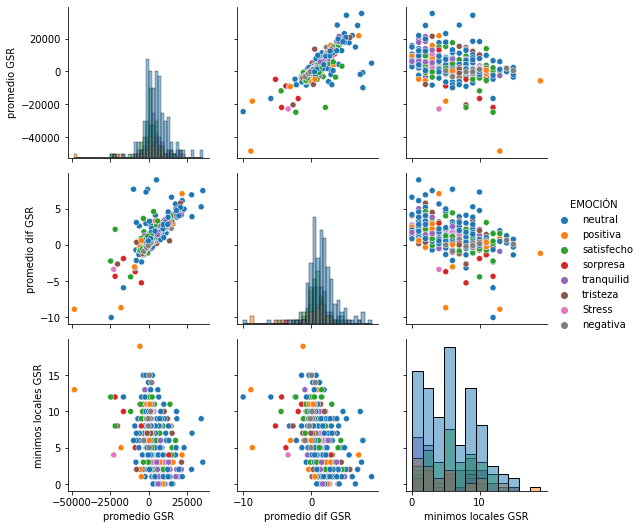

In [57]:
# Comparacion senales GSR (Galvanic Skin Response)
import seaborn as sns
g = sns.PairGrid(dfGSR, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

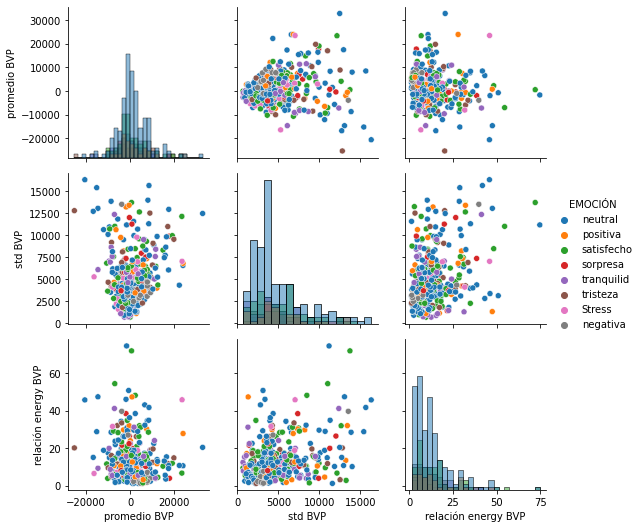

In [58]:
# Comparacion senales BVP (Blood Volume Pressure)
import seaborn as sns
g = sns.PairGrid(dfBVP, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

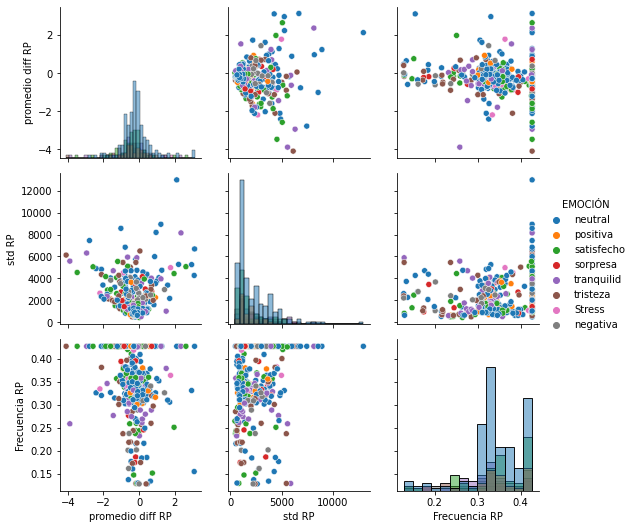

In [59]:
# Comparacion Senales RP (Respiration Pattern)
import seaborn as sns
g = sns.PairGrid(dfRP, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

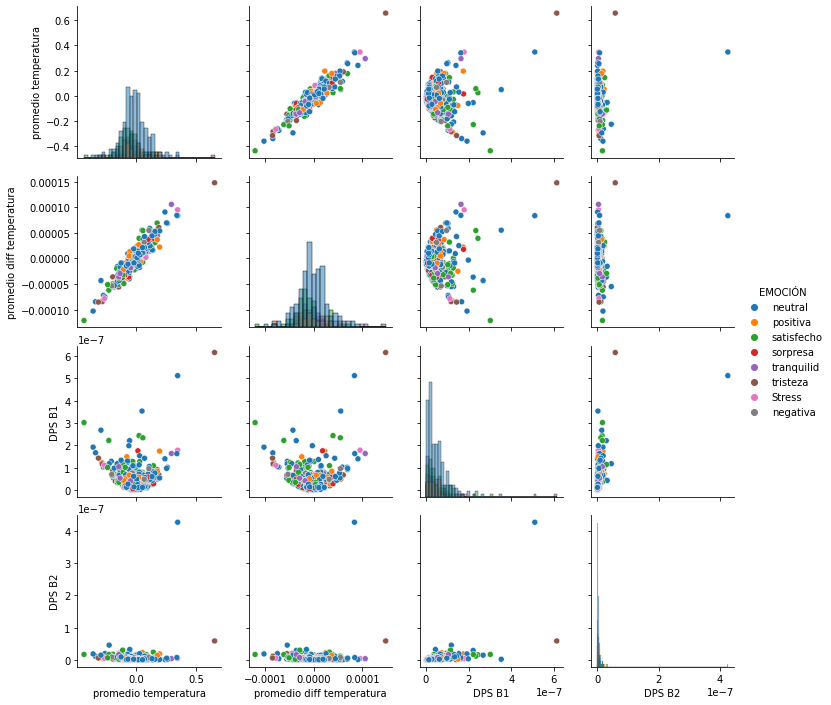

In [60]:
# Comparacion senal de temperatura
import seaborn as sns
g = sns.PairGrid(dfTEMPERATURA, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

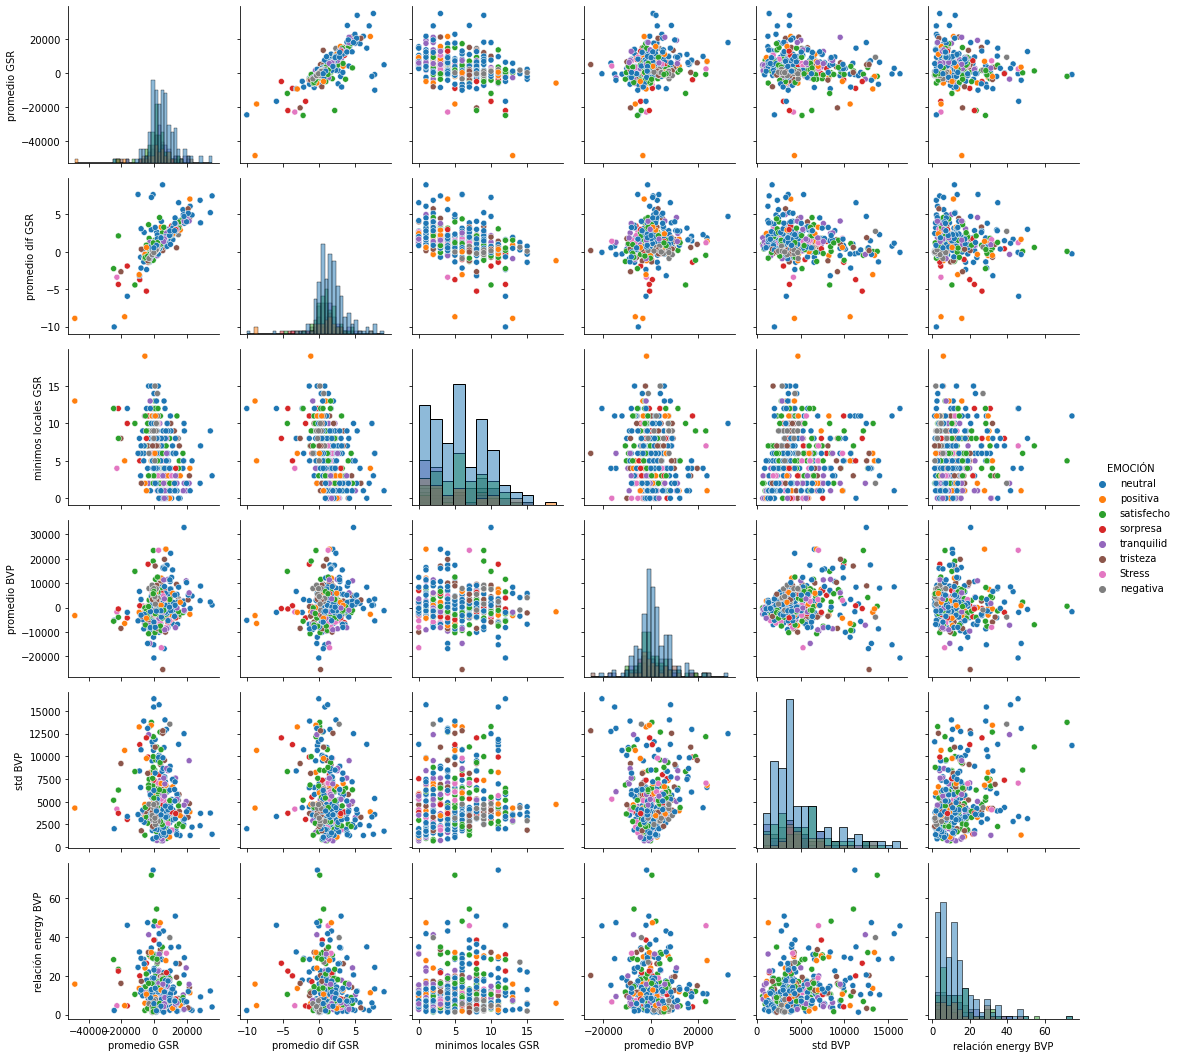

In [61]:
# GSR vs BVP
import seaborn as sns
g = sns.PairGrid(df_GSR_vs_BVP, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


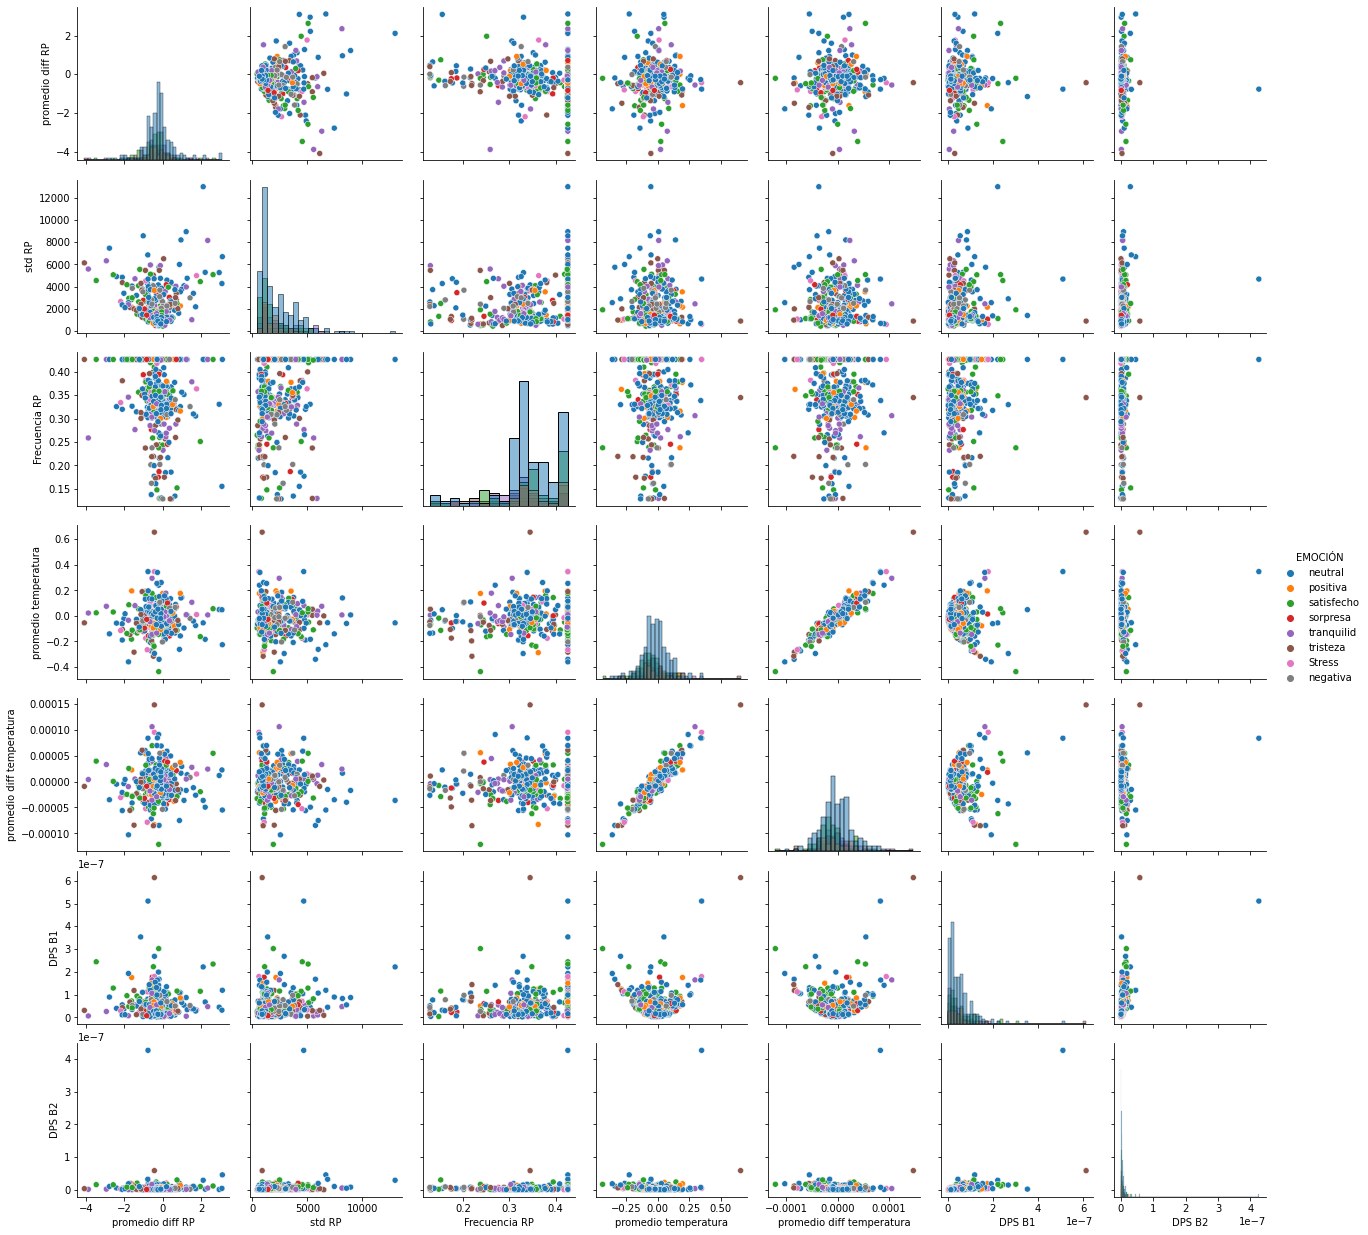

In [62]:
# RP vs TEMPERATURE
import seaborn as sns
g = sns.PairGrid(df_RP_vs_TEMPE, hue="EMOCIÓN")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


## Observaciones

* En algunas comparativas de señales es posible ver definida una curva de tendencia (línea recta) que permite reconocer la relación entre un tipo de señal y otra como es el caso del promedio y el promedio de la derivada.
* En algunas comparativas entre señales también es posible conocer zonas de agrupamiento donde se puede acotar los valores de una señal con respecto a otra por ejemplo se puede observar que las señales de patrón de respiración con respecto a la temperatura están acotadas en un valor pequeño de potencia espectral.
* Se esperaba observar una diferenciación marcada entre las emociones y valores separados de las señales, pero en la mayoría de casos se observa que es muy difícil reconocer que señal brinda una demarcación marcada o distante entre una emoción y las demás, esto las emociones si no estuvieran marcadas previamente por 'labels' serían imposibles de discriminar con comparaciones entre las señales analizadas.